In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('fault_data.csv')

In [5]:
df.head()

,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Fault ID                              506 non-null    object 
 1   Fault Type                            506 non-null    object 
 2   Fault Location (Latitude, Longitude)  506 non-null    object 
 3   Voltage (V)                           506 non-null    int64  
 4   Current (A)                           506 non-null    int64  
 5   Power Load (MW)                       506 non-null    int64  
 6   Temperature (°C)                      506 non-null    int64  
 7   Wind Speed (km/h)                     506 non-null    int64  
 8   Weather Condition                     506 non-null    object 
 9   Maintenance Status                    506 non-null    object 
 10  Component Health                      506 non-null    object 
 11  Duration of Fault (

In [11]:
df.describe()

,Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Duration of Fault (hrs),Down time (hrs)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2049.636364,216.458498,50.011858,30.166008,19.739130,4.008103,3.999802
std,142.054146,21.499787,3.102834,6.118315,5.863052,1.147271,1.842367
min,1800.000000,180.000000,45.000000,20.000000,10.000000,2.000000,1.000000
25%,1923.000000,197.250000,47.000000,25.000000,15.000000,3.000000,2.300000
50%,2058.000000,218.000000,50.000000,30.000000,19.500000,4.000000,4.000000
75%,2165.750000,235.000000,53.000000,36.000000,25.000000,5.000000,5.700000
max,2300.000000,250.000000,55.000000,40.000000,30.000000,6.000000,7.000000


In [13]:
df.isnull().sum()

Fault ID                                0
Fault Type                              0
Fault Location (Latitude, Longitude)    0
Voltage (V)                             0
Current (A)                             0
Power Load (MW)                         0
Temperature (°C)                        0
Wind Speed (km/h)                       0
Weather Condition                       0
Maintenance Status                      0
Component Health                        0
Duration of Fault (hrs)                 0
Down time (hrs)                         0
dtype: int64

In [57]:
df.nunique()

Fault ID                                506
Fault Type                                3
Fault Location (Latitude, Longitude)    506
Voltage (V)                             303
Current (A)                              71
Power Load (MW)                          11
Temperature (°C)                         21
Wind Speed (km/h)                        21
Weather Condition                         5
Maintenance Status                        3
Component Health                          3
Duration of Fault (hrs)                  41
Down time (hrs)                          61
dtype: int64

In [20]:
df['Fault Type'].unique()

array(['Line Breakage', 'Transformer Failure', 'Overheating'],
      dtype=object)

In [22]:
df['Weather Condition'].unique()

array(['Clear', 'Rainy', 'Windstorm', 'Snowy', 'Thunderstorm'],
      dtype=object)

In [24]:
df['Maintenance Status'].unique()

array(['Scheduled', 'Completed', 'Pending'], dtype=object)

In [26]:
df['Component Health'].unique()

array(['Normal', 'Faulty', 'Overheated'], dtype=object)

### visulization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

<Axes: xlabel='Fault Type'>

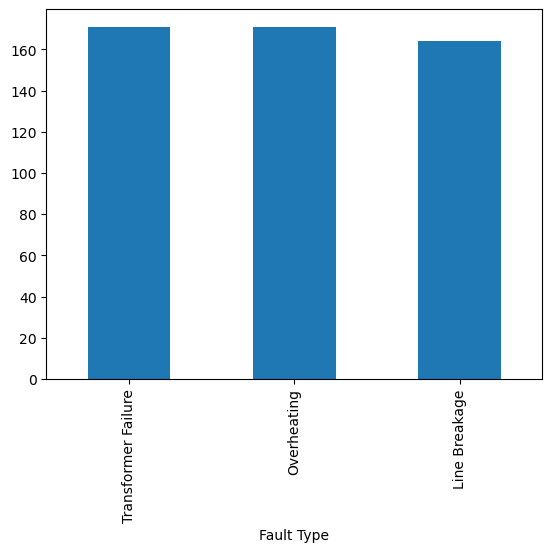

In [39]:
df['Fault Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Weather Condition'>

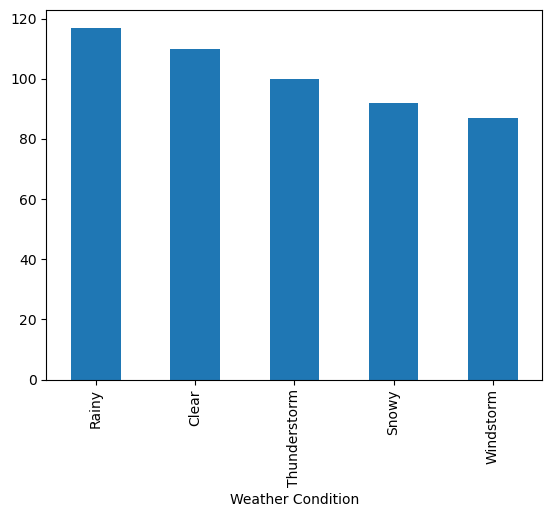

In [30]:
df['Weather Condition'].value_counts().plot(kind='bar')

<Axes: xlabel='Maintenance Status'>

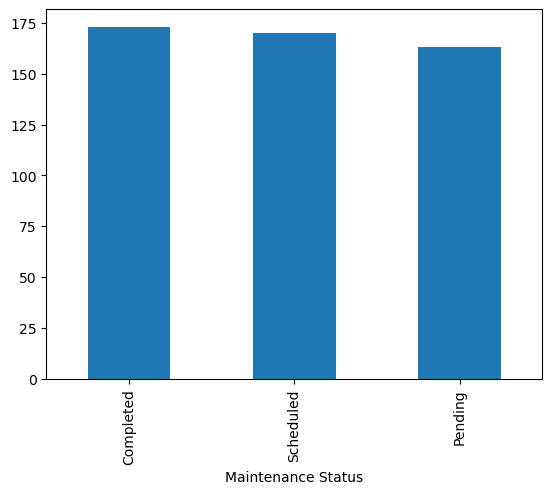

In [32]:
df['Maintenance Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Component Health'>

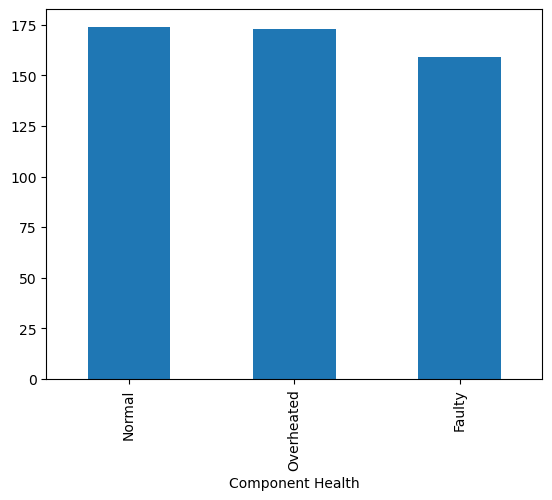

In [34]:
df['Component Health'].value_counts().plot(kind='bar')

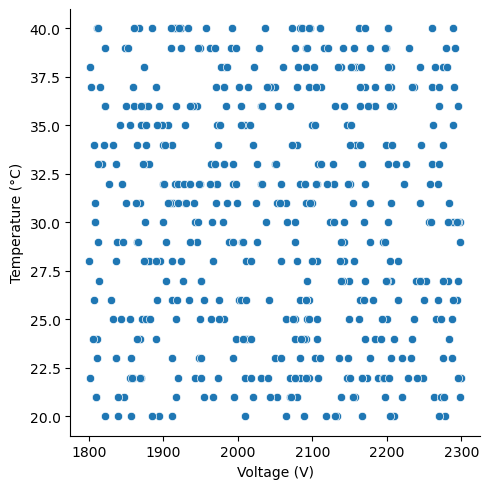

In [49]:
sns.relplot(data=df, x="Voltage (V)", y="Temperature (°C)")

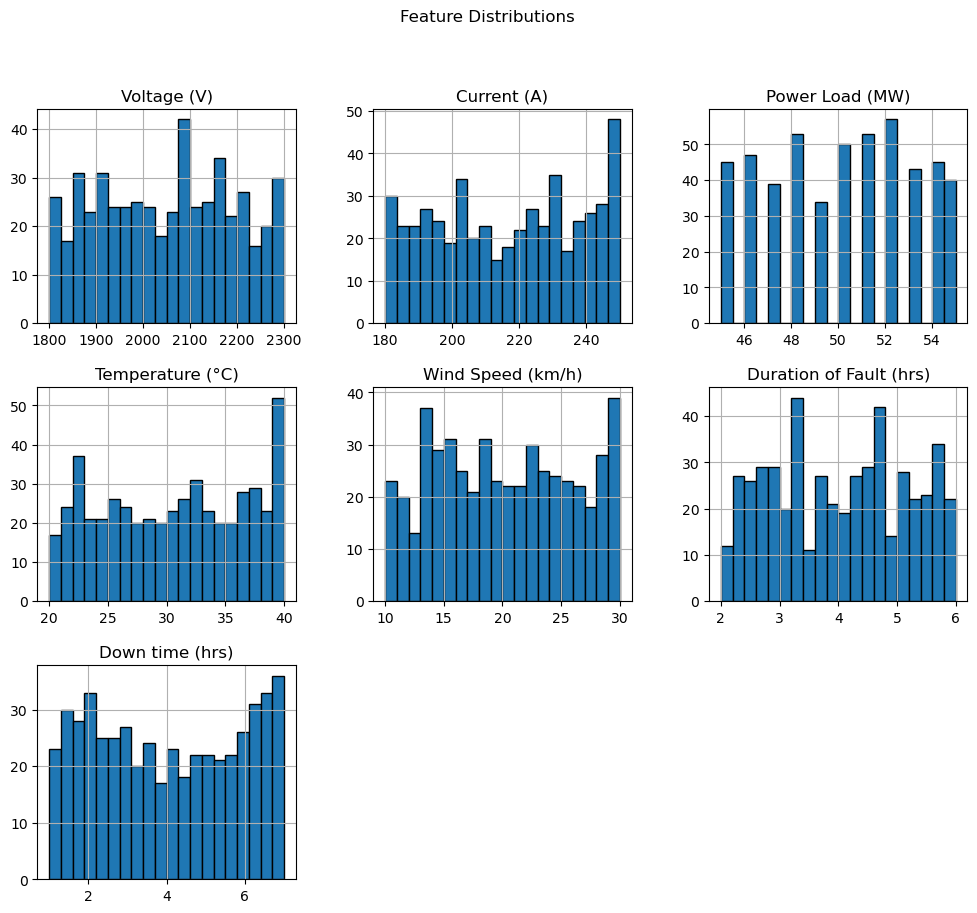

In [51]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

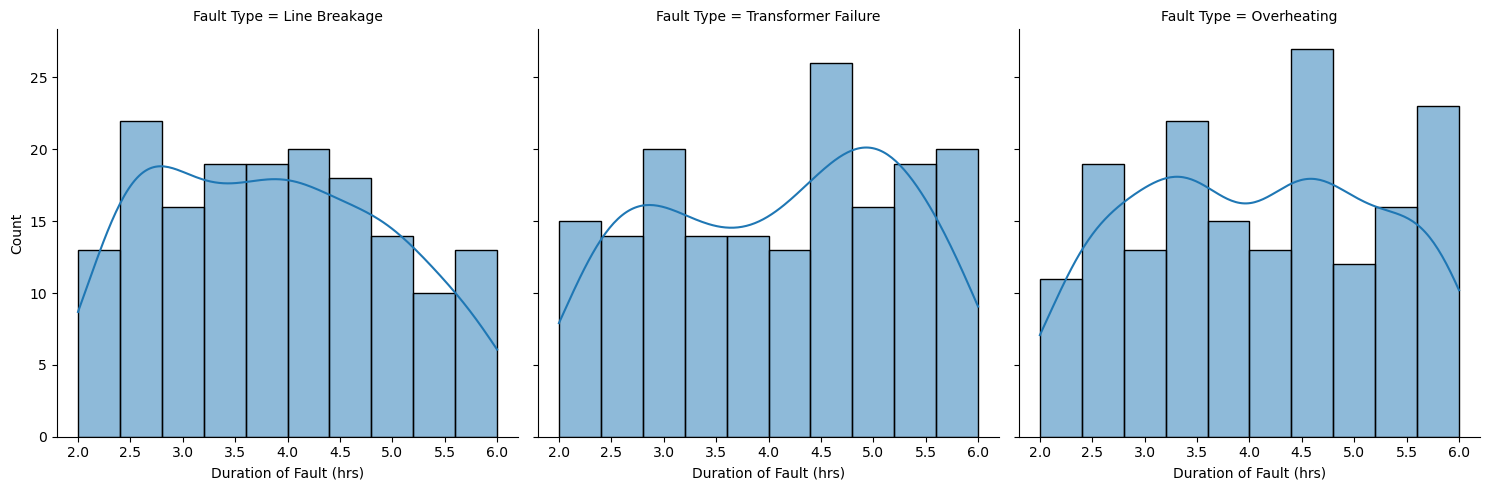

In [61]:
sns.displot(data=df, x="Duration of Fault (hrs)", col="Fault Type", kde=True)

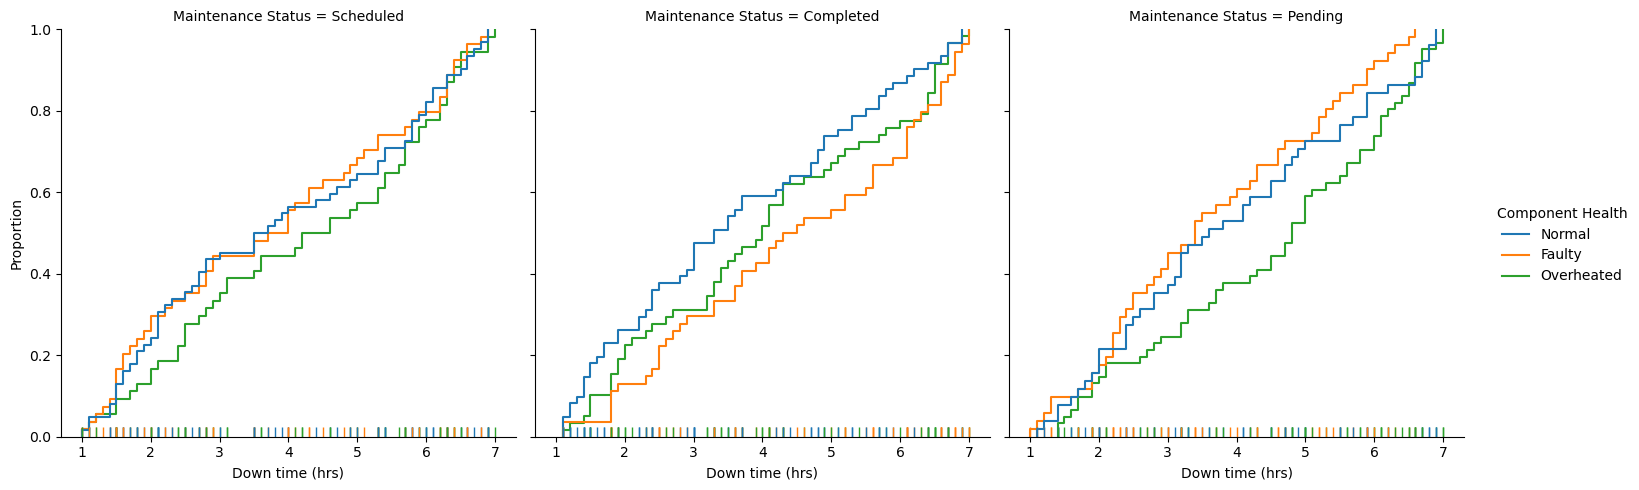

In [67]:
sns.displot(data=df, kind="ecdf", x="Down time (hrs)", col="Maintenance Status", hue="Component Health", rug=True)
#sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

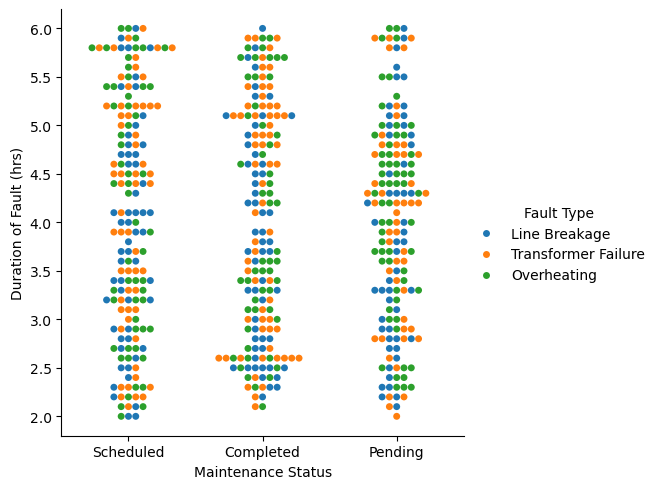

In [69]:
sns.catplot(data=df, kind="swarm", x="Maintenance Status", y="Duration of Fault (hrs)", hue="Fault Type")

In [41]:
df.isnull().sum()

Fault ID                                0
Fault Type                              0
Fault Location (Latitude, Longitude)    0
Voltage (V)                             0
Current (A)                             0
Power Load (MW)                         0
Temperature (°C)                        0
Wind Speed (km/h)                       0
Weather Condition                       0
Maintenance Status                      0
Component Health                        0
Duration of Fault (hrs)                 0
Down time (hrs)                         0
dtype: int64